In [1]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df=pd.read_csv("dataframe_cleared.csv")


In [10]:
rounded_df = df.round(3)
print(rounded_df)

    ID     Name  best_known_sol  3_min  2.5_min  2_min  1.5_min  1_min  \
0    0     br17              39     39       39     39       39     39   
1    1     ft53            6905   7937     7937   7937     7937   7937   
2    2     ft70           38673  40708    40708  40708    40708  40708   
3    3    ftv33            1286   1382     1382   1382     1382   1382   
4    4    ftv35            1473   1555     1555   1555     1555   1555   
5    5    ftv38            1530   1618     1618   1618     1618   1618   
6    6    ftv44            1613   1768     1768   1768     1768   1768   
7    7    ftv47            1776   2041     2041   2041     2041   2041   
8    8    ftv55            1608   1758     1758   1758     1758   1758   
9    9    ftv64            1839   1974     1974   1974     1974   1974   
10  10    ftv70            1950   2216     2216   2216     2216   2216   
11  11   ftv170            2755   3428     3428   3428     3428   3430   
12  12  kro124p           36230  39757

In [11]:
rounded_df.drop(columns = "ID", inplace = True)


In [12]:
import numpy as np

rounded_df.replace(np.nan, "NA", inplace=True)
print(rounded_df)
rounded_df.to_csv("dataframe_rounded.csv")

       Name  best_known_sol  3_min  2.5_min  2_min  1.5_min  1_min  0.5_min  \
0      br17              39     39       39     39       39     39       39   
1      ft53            6905   7937     7937   7937     7937   7937     7937   
2      ft70           38673  40708    40708  40708    40708  40708    40708   
3     ftv33            1286   1382     1382   1382     1382   1382     1382   
4     ftv35            1473   1555     1555   1555     1555   1555     1555   
5     ftv38            1530   1618     1618   1618     1618   1618     1618   
6     ftv44            1613   1768     1768   1768     1768   1768     1768   
7     ftv47            1776   2041     2041   2041     2041   2041     2041   
8     ftv55            1608   1758     1758   1758     1758   1758     1758   
9     ftv64            1839   1974     1974   1974     1974   1974     1974   
10    ftv70            1950   2216     2216   2216     2216   2216     2216   
11   ftv170            2755   3428     3428   3428  

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              19 non-null     int64  
 1   Name            19 non-null     object 
 2   best_known_sol  19 non-null     int64  
 3   3_min           19 non-null     int64  
 4   2.5_min         19 non-null     int64  
 5   2_min           19 non-null     int64  
 6   1.5_min         19 non-null     int64  
 7   1_min           19 non-null     int64  
 8   0.5_min         19 non-null     int64  
 9   0.25_min        19 non-null     int64  
 10  50_%            19 non-null     float64
 11  30_%            19 non-null     float64
 12  20_%            17 non-null     float64
 13  15_%            16 non-null     float64
 14  10_%            11 non-null     float64
 15  5_%             2 non-null      float64
 16  3_%             2 non-null      float64
 17  2_%             2 non-null      float

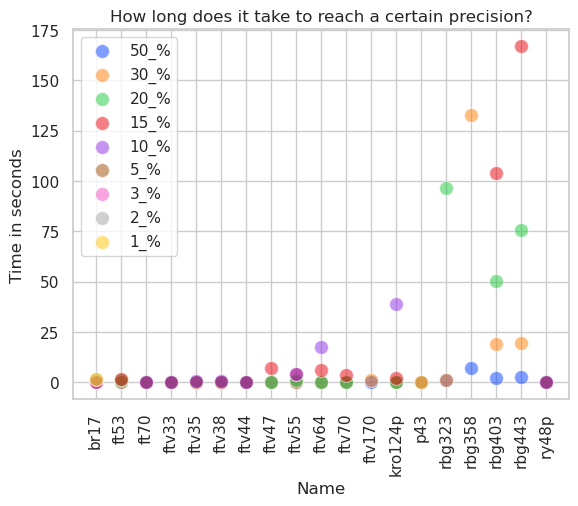

In [19]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook")

# create a bubble chart for each column
for i, col in enumerate(df.columns[10:]):
    sns.scatterplot(data=df, x='Name', y=col, s=100, alpha=0.5, label=col)

# set axis labels and legend
plt.xlabel('Name')
plt.ylabel('Time in seconds')
plt.title("How long does it take to reach a certain precision?")
plt.legend()
# rotate the x labels
plt.xticks(rotation=90)

plt.savefig("plot1.png", dpi=300, bbox_inches='tight')

# show the plot
plt.show()

In [24]:
for col in df.columns[3:10]:
    df[col] = 100 * (df[col] - df['best_known_sol']) / df['best_known_sol']

In [21]:
print(df)

    ID     Name  best_known_sol      3_min    2.5_min      2_min    1.5_min  \
0    0     br17              39   0.000000   0.000000   0.000000   0.000000   
1    1     ft53            6905  14.945692  14.945692  14.945692  14.945692   
2    2     ft70           38673   5.262069   5.262069   5.262069   5.262069   
3    3    ftv33            1286   7.465008   7.465008   7.465008   7.465008   
4    4    ftv35            1473   5.566870   5.566870   5.566870   5.566870   
5    5    ftv38            1530   5.751634   5.751634   5.751634   5.751634   
6    6    ftv44            1613   9.609423   9.609423   9.609423   9.609423   
7    7    ftv47            1776  14.921171  14.921171  14.921171  14.921171   
8    8    ftv55            1608   9.328358   9.328358   9.328358   9.328358   
9    9    ftv64            1839   7.340946   7.340946   7.340946   7.340946   
10  10    ftv70            1950  13.641026  13.641026  13.641026  13.641026   
11  11   ftv170            2755  24.428312  24.42831

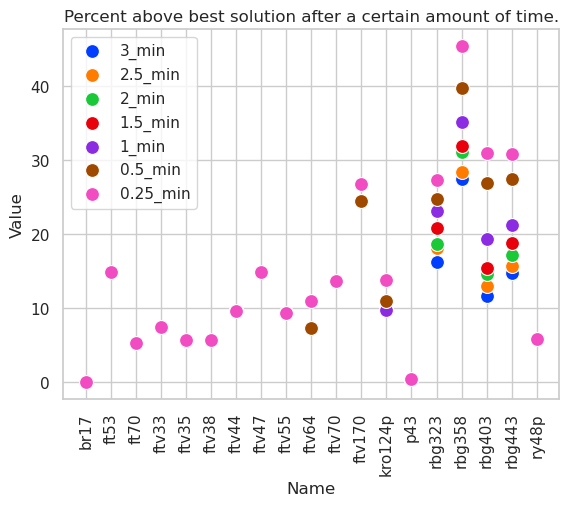

In [27]:
sns.set_style("whitegrid")
sns.set_palette("bright")
sns.set_context("notebook")

# create a bubble chart for each column
for i, col in enumerate(df.columns[3:10]):
    sns.scatterplot(data=df, x='Name', y=col, s=100, alpha=1, label=col)

# set axis labels and legend
plt.xlabel('Name')
plt.ylabel('Value')
plt.legend()
plt.title("Percent above best solution after a certain amount of time.")
# rotate the x labels
plt.xticks(rotation=90)

plt.savefig("plot2.png", dpi=300, bbox_inches='tight')

# show the plot
plt.show()
